# Seaborn: violinplot

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Intro Visuals

In [4]:
import pandas as pd
import numpy as np

In [5]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [6]:
blue, orange, green, red = sns.color_palette()[:4]

In [7]:
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

In [8]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

### Recipe

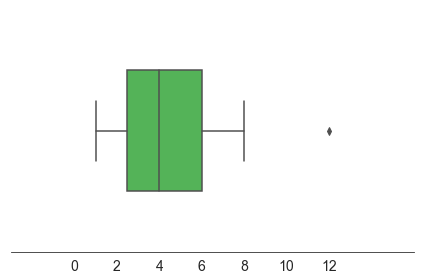

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(pts, color='#44C34A', width=0.5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

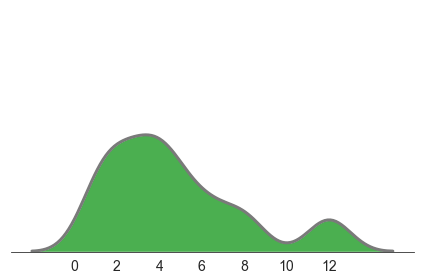

In [10]:
plt.figure(figsize=(6,4))
sns.kdeplot(pts, color='#4BAF50', shade=True, alpha=1, bw=1)
sns.kdeplot(pts, color='#7A7A7A', zorder=2, lw=3, bw=1)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.ylim(None, 0.3)
plt.xticks(range(0,13,2))
plt.yticks([])
plt.tight_layout();

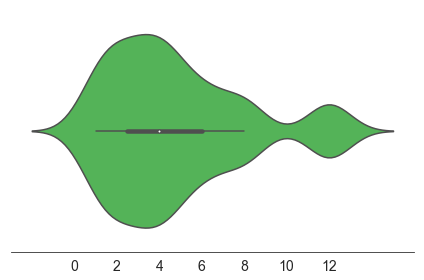

In [11]:
plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

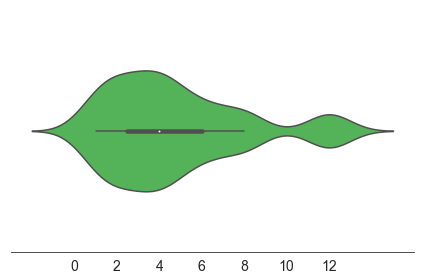

In [12]:
plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3, width=0.5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

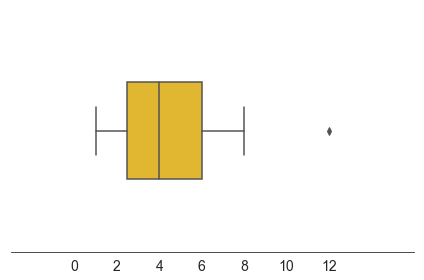

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=0.4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

In [14]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [15]:
sns.set_style('whitegrid')

In [16]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

Filter down to only cars with even number of cylinders

In [17]:
cars = cars[cars.cylinders.isin([4,6,8])]

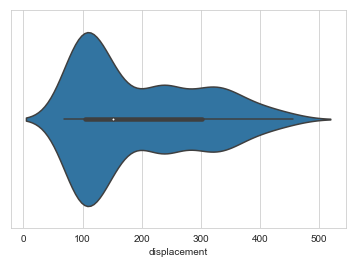

In [18]:
sns.violinplot(cars.displacement);

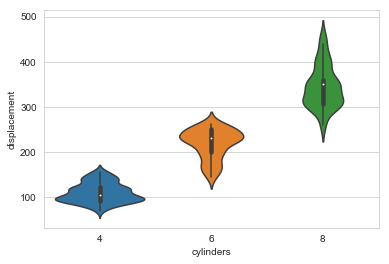

In [19]:
sns.violinplot(x=cars.cylinders, y=cars.displacement);

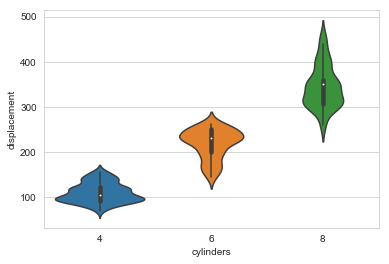

In [20]:
sns.violinplot(x='cylinders', y='displacement',
               data=cars
              );

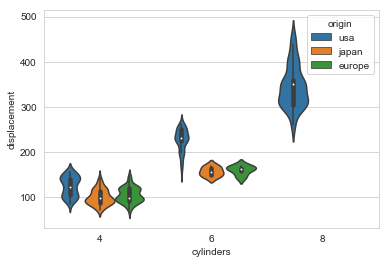

In [21]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars
              );

## Violinplot Options

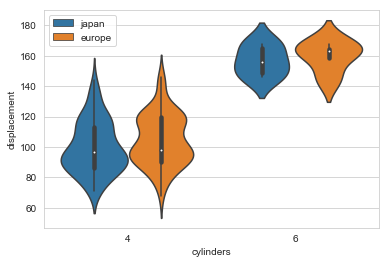

In [22]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])]
              )

plt.legend(loc=2);

### split

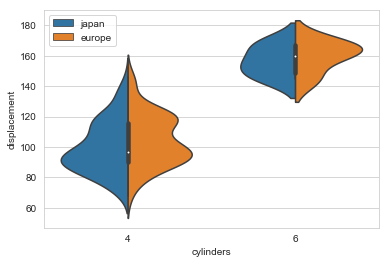

In [23]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True
              )

plt.legend(loc=2);

### inner

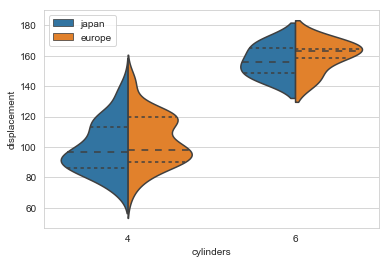

In [24]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               inner='quartiles'
              )

plt.legend(loc=2);

### scale

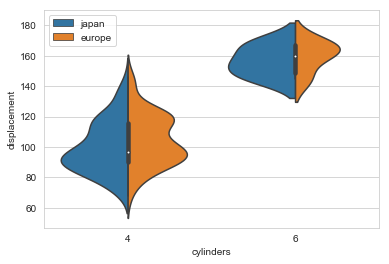

In [25]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               scale='count'
              )

plt.legend(loc=2);

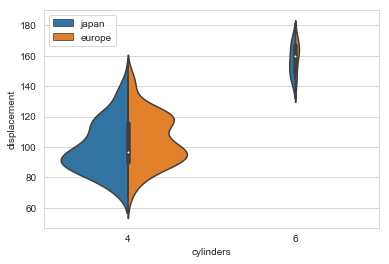

In [26]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               scale='count',
               scale_hue=False
              )

plt.legend(loc=2);

In [27]:
(
    cars[cars.origin.isin(['japan', 'europe'])]
    .groupby('cylinders')
    .origin
    .value_counts()
)

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

## Styling

### Box Options

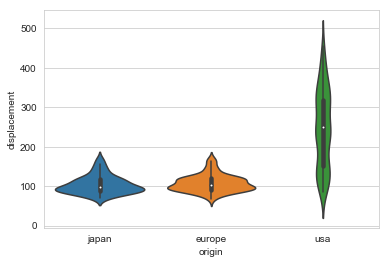

In [28]:
sns.violinplot(x=cars.origin, y=cars.displacement,
               order=['japan', 'europe', 'usa']
              );

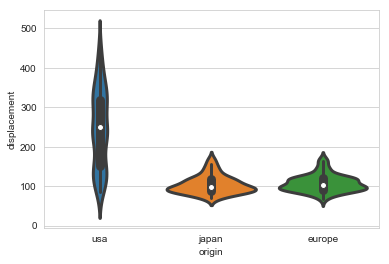

In [29]:
sns.violinplot(x=cars.origin, y=cars.displacement, 
               linewidth=3
              );

### KDE Options

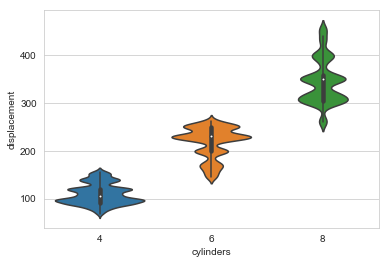

In [30]:
sns.violinplot(x=cars.cylinders, y=cars.displacement,
               bw=0.2
              );